In [5]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

Google Drive is already mounted



In [6]:
! ls /content/gdrive/My\ Drive/Colab\ Notebooks/dsc2019

DSC2019_예선_데이터.xlsx   st_data_goldKorea.tsv       st_data_oilForeign.tsv
st_data_exchange.tsv	   st_data_goodsForeign.tsv    st_data_oilKorea.tsv
st_data_foreignCharge.tsv  st_data_itemChargeFull.tsv
st_data_goldForeign.tsv    st_data_koreaIndex.tsv


In [154]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
    
# 학습데이터 로딩
dsc2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dsc2019/DSC2019_예선_데이터.xlsx')

goldKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldKorea.tsv',sep='\t') 
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
oilKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilKorea.tsv',sep='\t')
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
goodsForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goodsForeign.tsv',sep='\t')
foreignCharge = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_foreignCharge.tsv',sep='\t')
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.0.3


In [156]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


In [157]:
print(goldKorea.head())
print(goldForeign.head())
print(oilKorea.head())
print(oilForeign.head())
print(exchange.head())

       date  deal_val  change_val  change_rate   buy_val  sell_val  \
0  20150107  43037.95      220.23      0.51434  45189.84  40886.06   
1  20150113  43276.83      641.66      1.50500  45440.67  41112.99   
2  20150116  43593.24      919.74      2.15530  45772.90  41413.58   
3  20150119  44243.53      650.29      1.49172  46455.70  42031.36   
4  20150122  44915.09     -362.83     -0.80134  47160.84  42669.34   

   deposit_val  withdraw_val  international_val  usd_rate  
0     43468.32      42607.58            1214.85    1102.0  
1     43709.59      42844.07            1242.45    1083.5  
2     44029.17      43157.31            1257.92    1078.0  
3     44685.96      43801.10            1275.50    1079.0  
4     45364.24      44465.94            1287.70    1085.0  
  itemcode itemname      date  close_val  change_val  open_val  high_val  \
0   COM@GC     국제 금  20150107     1210.6        -8.7    1219.2    1219.2   
1   COM@GC     국제 금  20150113     1234.3         1.6    1239.2    1

In [158]:
print(goldKorea.info())
print(goldForeign.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null int64
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null float64
dtypes: float64(9), int64(1)
memory usage: 25.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null int64
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: float64(5), int64(1), o

In [0]:
goldKorea=convertToDatetime(goldKorea)
goldForeign=convertToDatetime(goldForeign)
oilKorea=convertToDatetime(oilKorea)
oilForeign=convertToDatetime(oilForeign)
exchange=convertToDatetime(exchange)
goodsForeign=convertToDatetime(goodsForeign)
foreignCharge=convertToDatetime(foreignCharge)
itemChargeFull=convertToDatetime(itemChargeFull)
koreaIndex=convertToDatetime(koreaIndex)


In [0]:
import datetime

def convertToDatetime(df):
  try:
    dates=[]
    for i in df['date']:
      date=str(i)
      convertDate = datetime.datetime.strptime(date,'%Y%m%d').date()
      dates.append(convertDate)
  
    df['date'] = pd.to_datetime(dates)
  except :
    print('{}'.format(df.info()))
  return df

def groupByItem(df):
  return df.groupby(df['itemcode'])

def splitGold(df):
  groupedGold = groupByItem(df)
  for name , group in groupedGold:
    if name=='COM@GC':
      gold = group
    elif name=='NYM@PA':
      paladium = group
    elif name=='NYM@PL':
      whiteGold = group
    elif name=='COM@SI':
      silver = group
  return gold, paladium, whiteGold, silver

def splitOil(df):
  groupedOil = groupByItem(df)
  for name , group in groupedOil:
    if name=='IPE@EB':
      brentOil = group
    elif name=='NYM@CL':
      wTexasOil = group
    elif name=='NYM@DC':
      dubaiOil = group
  return brentOil, wTexasOil, dubaiOil

def setDateIndex(df):
  df=df.set_index('date',inplace=False)
  return df

In [249]:
print(goldForeign['itemcode'].unique())
print(goldForeign['itemname'].unique())

['COM@GC' 'NYM@PA' 'NYM@PL' 'COM@SI']
['국제 금' '팔라듐' '백금' '은']


In [250]:
print(oilForeign['itemcode'].unique())
print(oilForeign['itemname'].unique())

['IPE@EB' 'NYM@CL' 'NYM@DC']
['브렌트유' 'WTI(서부텍사스유) ' '두바이유']


In [251]:
gold, paladium, whiteGold, silver = splitGold(goldForeign)
brentOil, wTexasOil, dubaiOil = splitOil(oilForeign)

IPE@EB
NYM@CL
NYM@DC


In [0]:
gold=setDateIndex(gold)
paladium=setDateIndex(paladium)
whiteGold=setDateIndex(whiteGold)
silver=setDateIndex(silver)
brentOil=setDateIndex(brentOil)
wTexasOil=setDateIndex(wTexasOil)
dubaiOil=setDateIndex(dubaiOil)

In [270]:
print(gold.columns)
print(silver.columns)
print(brentOil.columns)
print(goldKorea.columns)

Index(['itemcode', 'itemname', 'close_val', 'change_val', 'open_val',
       'high_val', 'low_val'],
      dtype='object')
Index(['itemcode', 'itemname', 'close_val', 'change_val', 'open_val',
       'high_val', 'low_val'],
      dtype='object')
Index(['itemcode', 'itemname', 'close_val', 'change_val', 'open_val',
       'high_val', 'low_val'],
      dtype='object')
Index(['date', 'deal_val', 'change_val', 'change_rate', 'buy_val', 'sell_val',
       'deposit_val', 'withdraw_val', 'international_val', 'usd_rate'],
      dtype='object')


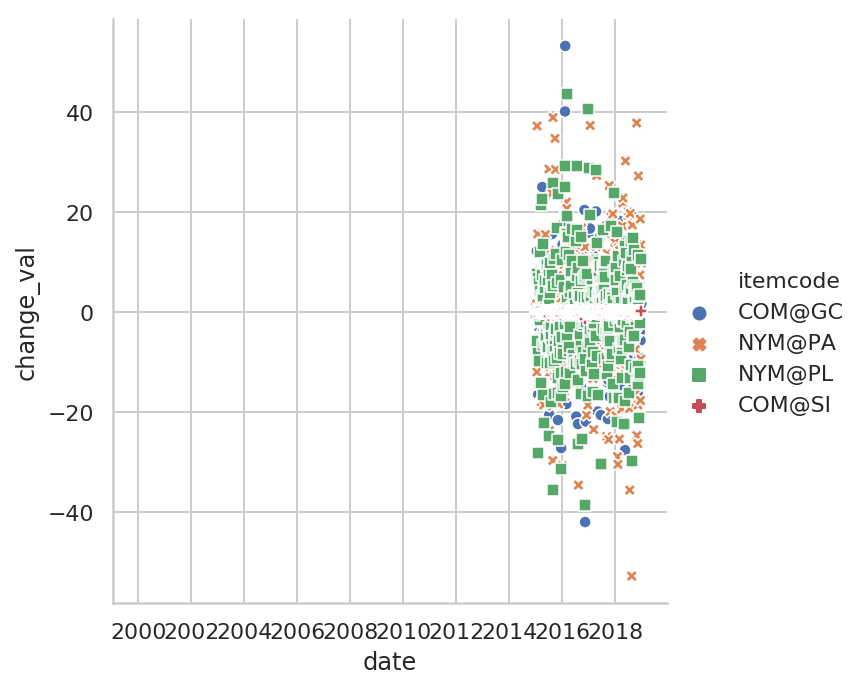

In [219]:
sns.relplot(x="date", y="change_val",hue="itemcode", style="itemcode",
            data=goldForeign)

In [0]:
seaborn.tsplot(data=data)

In [37]:
print(dsc2019['COL NAME2'])
#print(dsc2019.loc[:,:])

print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print(goldKorea.loc[:,['date','''change_val']])

print(goldForeign.loc[:,['date','change_val']])
print(oilKorea.loc[:,['date','change_val']])

print(oilForeign.loc[:,['date','change_val']])
print(exchange.loc[:,['date','change_val']])

print(goodsForeign.loc[:,['date','change_val']])
print(foreignCharge.loc[:,['date','change_val']])

print(itemChargeFull.loc[:,['date','change_val']])
print(koreaIndex.loc[:,['date','change_val']])


0            지수명
1           기준일자
2             종가
3           전일대비
4            등락률
5        거래량(천주)
6       거래대금(백만)
7           종목코드
8            종목명
9            지수명
10          기준일자
11            종가
12          전일대비
13           등락률
14           거래량
15       부채총계(억)
16           액면가
17         외국인비율
18            고가
19     상장주식수(천주)
20            저가
21       시가총액(억)
22      당기순이익(억)
23            시가
24       영업이익(억)
25       영업이익증가율
26         전일거래량
27       자산총계(억)
28        유보율(%)
29        ROA(%)
         ...    
64        실물.사실때
65        실물.파실때
66        계좌.입금시
67        계좌.해지시
68    기준 국제 금 시세
69     기준 원달러 환율
70         원자재코드
71          원자재명
72          기준일자
73            종가
74          전일대비
75            시가
76            고가
77            저가
78         원자재코드
79          원자재명
80          기준일자
81            종가
82          전일대비
83            시가
84            고가
85            저가
86         원자재코드
87          원자재명
88          기준일자
89            종가
90          전일대비
91            